In [ ]:
import numpy as np

In [ ]:
a_1 = np.array((1.1, 1.3))  # 1 x 2
a_2 = np.array((1.7, 1.4))
a_3 = np.array((1.2, 2.0))
a_4 = np.array((1.6, 1.9))

b_1 = np.array((2.7, 1.4))
b_2 = np.array((2.6, 1.2))
b_3 = np.array((2.2, 2.0))
b_4 = np.array((2.2, 1.3))

c_1 = np.array((1.4, 2.5))
c_2 = np.array((1.2, 2.4))
c_3 = np.array((1.8, 2.6))
c_4 = np.array((1.5, 2.9))

x_t = np.array((2, 2))

In [ ]:
def euclidean_distance(x1, x2):
    d = np.sqrt((x1[0]- x2[0])**2 + (x1[1] - x2[1])**2)
    return d

def manhattan_distance(x1, x2):
    d = abs(x1[0] - x2[0]) + abs(x1[1] - x2[1])
    return d



(12, 2) (12,)


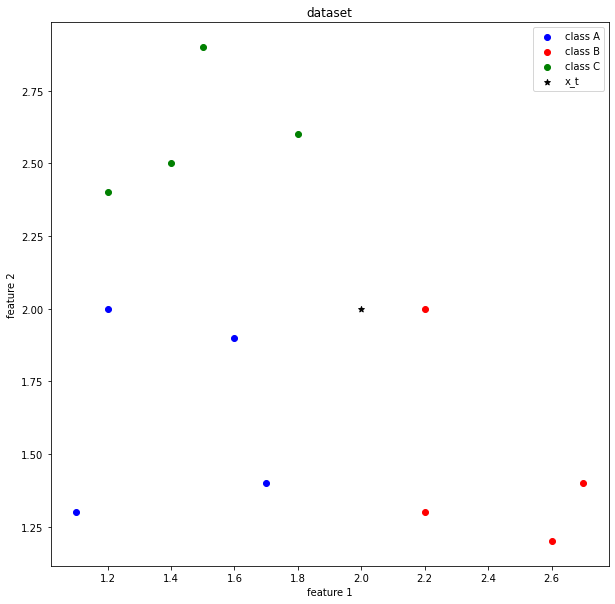

In [ ]:
# TODO plot the samples
import matplotlib.pyplot as plt

ds_x = np.vstack((a_1, a_2, a_3, a_4, b_1, b_2, b_3, b_4, c_1, c_2, c_3, c_4))  # 12 x 2
ds_y = np.array((0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2)) # 12 values

print(ds_x.shape, ds_y.shape)

# plt.scatter(ds_x[:, 0], ds_x[:, 1])
cls_a = ds_x[ds_y==0, :]  # 4 x 2
cls_b = ds_x[ds_y==1, :]
cls_c = ds_x[ds_y==2, :]

plt.figure(figsize=(10, 10))

# scatter points for each class
plt.scatter(cls_a[:, 0], cls_a[:, 1], c='b', label='class A')
plt.scatter(cls_b[:, 0], cls_b[:, 1], c='r', label='class B')
plt.scatter(cls_c[:, 0], cls_c[:, 1], c='g', label='class C')

plt.scatter(x_t[0], x_t[1], c='k', marker='*', label='x_t')

plt.title("dataset")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()

plt.show()



In [ ]:
# TODO classify the pattern x_t with a k-NN with k = 1, 2, 3, 4
import scipy.stats
for k in [1, 2, 3, 4]:
    distances = np.zeros(12)
    for point_idx in range(ds_x.shape[0]):
        x_i = ds_x[point_idx, :]
        distances[point_idx] = euclidean_distance(x_t, x_i)
        ranked_distances = np.argsort(distances)
        labels_argsort = ds_y[ranked_distances][:k]
        most_frequent = scipy.stats.mode(labels_argsort)[0]
    print(k, most_frequent)

1 [1]
2 [0]
3 [0]
4 [0]


In [ ]:
# TODO use the leave-one-out method to select the best value of k

for k in [1, 2, 3, 4, 5, 6]:
    distances = np.zeros((12, 12))
    for row_idx in range(ds_x.shape[0]):
        for col_idx in range(ds_x.shape[0]):
            distances[row_idx, col_idx] = euclidean_distance(ds_x[row_idx, :], ds_x[col_idx, :])
    ranked_distances = np.argsort(distances, axis=0)
    labels_argsort = ds_y[ranked_distances][1:k+1]
    most_frequent = scipy.stats.mode(labels_argsort)[0][0]
    correct = ds_y == most_frequent
    correct = correct.sum()
    print(k, correct)


1 10
2 10
3 10
4 12
5 11
6 9
